# Data Exploration for a Movies dataset

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [3]:
#Read file dataset
df = pd.read_csv(r'C:\Users\USER\Downloads\movies.csv')

In [4]:
#Having a look at the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#Checking for null values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
#To check for data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df.genre.value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

In [10]:
df['profit'] = (df['gross'] - df['budget'])
df['profit']
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0


In [11]:
#Checking to see distribution of Genre and Budget
df_count_budget=df.groupby('genre')['budget'].value_counts().sort_values(ascending = False)
df_count_budget

genre    budget    
Comedy   20000000.0    94
         15000000.0    66
Action   30000000.0    65
Comedy   25000000.0    61
         30000000.0    60
                       ..
         27000.0        1
         75000.0        1
         90000.0        1
         125000.0       1
Western  11000000.0     1
Name: budget, Length: 1137, dtype: int64

In [12]:
# Checking to see the genre of movies with highest gross 
df_count_gross=df.groupby('genre')['gross'].value_counts().sort_values(ascending = False)
df_count_gross

genre      gross      
Comedy     10000000.0     2
           626057.0       2
Action     2970.0         1
Comedy     235483004.0    1
           252909177.0    1
                         ..
Biography  1672927.0      1
           1635056.0      1
           1600226.0      1
           1585583.0      1
Western    18289763.0     1
Name: gross, Length: 7477, dtype: int64

In [13]:
#Checking to see how people voted according to Genre
df_count_votes=df.groupby('genre')['votes'].value_counts().sort_values(ascending = False)
df_count_votes

genre    votes   
Comedy   14000.0     41
         13000.0     39
         12000.0     38
         11000.0     38
         19000.0     34
                     ..
         284000.0     1
         283000.0     1
         282000.0     1
         276000.0     1
Western  4200.0       1
Name: votes, Length: 2676, dtype: int64

# Graphical presentation

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


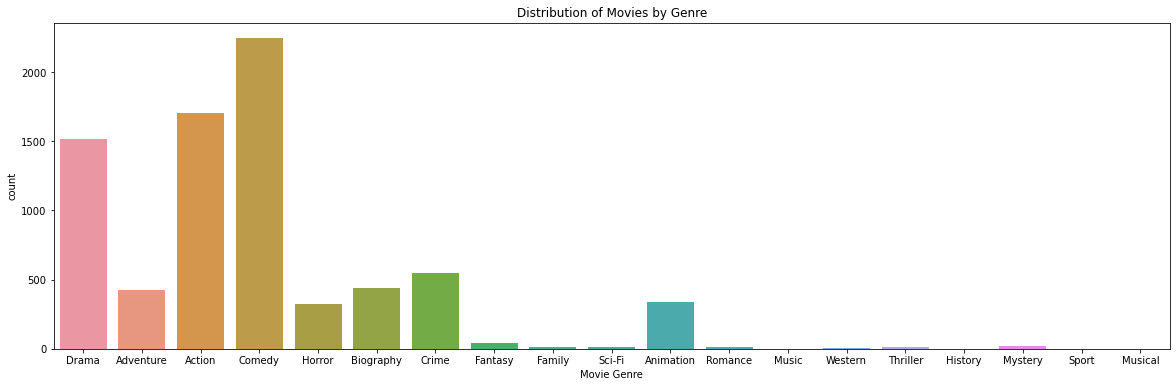

In [25]:
#Checking movies distribution by Genre
plt.figure(figsize=(20,6))
sns.countplot('genre',data=df)

plt.xlabel('Movie Genre')

plt.ylabel('count')

plt.title('Distribution of Movies by Genre');

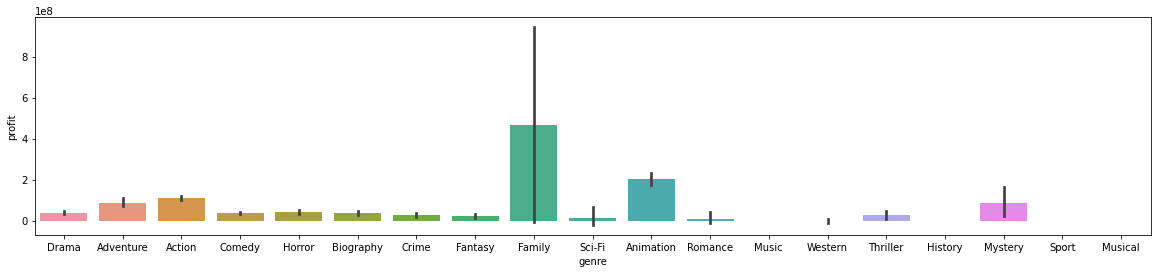

In [18]:

plt.figure(figsize=(20,4))
sns.barplot(x='genre', y='profit', data=df);

# Correlation


In [20]:
#Checking for correlation
df.corr()

,year,score,votes,budget,gross,runtime,profit
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.237364
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.242928
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.609313
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.610661
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.984418
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.241337
profit,0.237364,0.242928,0.609313,0.610661,0.984418,0.241337,1.000000


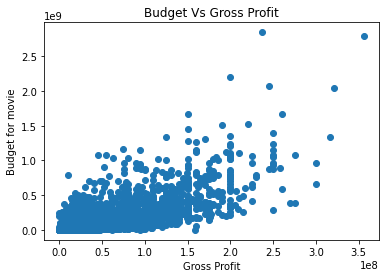

In [21]:
# Checking to see the correlation between Budget and Gross

plt.scatter(x =df['budget'], y =df['gross'])

plt.title ('Budget Vs Gross Profit')

plt.xlabel ('Gross Profit')

plt.ylabel ('Budget for movie')
plt.show()

In [22]:
# Plot using Seaborn to determine Budget and Gross

<AxesSubplot:xlabel='budget', ylabel='gross'>

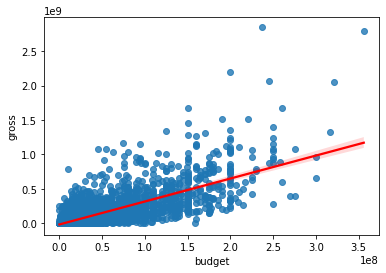

In [23]:
sns.regplot(x = 'budget', y = 'gross', data=df, line_kws={"color":"red"}) 

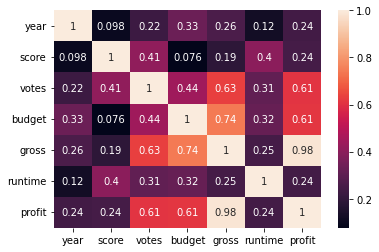

In [24]:
#Using heat map to check correlation
sns.heatmap(df.corr(), annot = True)
plt.show()